# TrendTracker: Exploring Trending Youtube Videos in Canada

We can now take the features we created and construct preliminary machine learning models. The target variable will be a feature we created, which was views per date until trending.

### Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Change format
pd.options.display.float_format = '{:.12f}'.format

In [4]:
# File name represents most recent update
file = r'/Users/OliverPan/Desktop/youtube_data/trend_features.csv'

In [5]:
model_features = pd.read_csv(file)

/Users/oliverpan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,12,13,14,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
model_features.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,likes_to_dislikes,time_to_trend,youtube_link,no_description,views_per_date,num_trending,num_per_day
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10.000000000000,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.000000000000,296541.000000000000,...,False,False,CLASH official music video performed by DILJIT...,47.983980582524,1.000000000000,https://www.youtube.com/watch?v=KX06ksuS6Xo,0.000000000000,9140911.000000000000,18.000000000000,230.000000000000
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.000000000000,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.000000000000,353797.000000000000,...,False,False,I left youtube for a month and this is what ha...,134.625951293759,1.000000000000,https://www.youtube.com/watch?v=J78aPJ3VyNs,0.000000000000,2038853.000000000000,11.000000000000,230.000000000000
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.000000000000,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688.000000000000,146740.000000000000,...,False,False,"While running her own modding shop, Ramya Pare...",52.519685039370,1.000000000000,https://www.youtube.com/watch?v=M9Pmf9AB4Mo,0.000000000000,2381688.000000000000,54.000000000000,230.000000000000
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.000000000000,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.000000000000,156914.000000000000,...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,26.790848557282,1.000000000000,https://www.youtube.com/watch?v=3C66w5Z0ixs,0.000000000000,1514614.000000000000,12.000000000000,230.000000000000
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.000000000000,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.000000000000,45803.000000000000,...,False,False,Transforming The LaBrant Family's empty white ...,47.513485477178,1.000000000000,https://www.youtube.com/watch?v=VIUo6yapDbc,0.000000000000,1123889.000000000000,11.000000000000,230.000000000000


In [7]:
model_features.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'likes_to_dislikes', 'time_to_trend',
       'youtube_link', 'no_description', 'views_per_date', 'num_trending',
       'num_per_day'],
      dtype='object')

In [8]:
# Remove some variables temporarily
model_features = model_features[['views_per_date', 'categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled','likes_to_dislikes', 'time_to_trend', 'no_description', 'num_trending']]

In [9]:
model_features.head()

,views_per_date,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_to_dislikes,time_to_trend,no_description,num_trending
0,9140911.000000000000,10.000000000000,9140911.000000000000,296541.000000000000,6180.000000000000,30059.000000000000,False,False,47.983980582524,1.000000000000,0.000000000000,18.000000000000
1,2038853.000000000000,24.000000000000,2038853.000000000000,353797.000000000000,2628.000000000000,40222.000000000000,False,False,134.625951293759,1.000000000000,0.000000000000,11.000000000000
2,2381688.000000000000,20.000000000000,2381688.000000000000,146740.000000000000,2794.000000000000,16549.000000000000,False,False,52.519685039370,1.000000000000,0.000000000000,54.000000000000
3,1514614.000000000000,22.000000000000,1514614.000000000000,156914.000000000000,5857.000000000000,35331.000000000000,False,False,26.790848557282,1.000000000000,0.000000000000,12.000000000000
4,1123889.000000000000,26.000000000000,1123889.000000000000,45803.000000000000,964.000000000000,2198.000000000000,False,False,47.513485477178,1.000000000000,0.000000000000,11.000000000000


In [10]:
# Change to categorical
model_features['comments_disabled'] = model_features['comments_disabled'].astype('category').cat.codes
model_features['ratings_disabled'] = model_features['ratings_disabled'].astype('category').cat.codes

In [11]:
model_features = model_features.replace([np.inf, -np.inf], np.nan)
model_features = model_features.dropna()

In [12]:
model_features.head()

,views_per_date,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_to_dislikes,time_to_trend,no_description,num_trending
0,9140911.000000000000,10.000000000000,9140911.000000000000,296541.000000000000,6180.000000000000,30059.000000000000,0,0,47.983980582524,1.000000000000,0.000000000000,18.000000000000
1,2038853.000000000000,24.000000000000,2038853.000000000000,353797.000000000000,2628.000000000000,40222.000000000000,0,0,134.625951293759,1.000000000000,0.000000000000,11.000000000000
2,2381688.000000000000,20.000000000000,2381688.000000000000,146740.000000000000,2794.000000000000,16549.000000000000,0,0,52.519685039370,1.000000000000,0.000000000000,54.000000000000
3,1514614.000000000000,22.000000000000,1514614.000000000000,156914.000000000000,5857.000000000000,35331.000000000000,0,0,26.790848557282,1.000000000000,0.000000000000,12.000000000000
4,1123889.000000000000,26.000000000000,1123889.000000000000,45803.000000000000,964.000000000000,2198.000000000000,0,0,47.513485477178,1.000000000000,0.000000000000,11.000000000000


In [13]:
model_features.corr()

,views_per_date,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_to_dislikes,time_to_trend,no_description,num_trending
views_per_date,1.000000000000,0.779080381189,0.616313050851,0.676852624085,0.019298677606,nan,-0.030909781986,-0.073168621769,-0.012481064834,0.214460032749
likes,0.779080381189,1.000000000000,0.748775563577,0.806590779475,-0.013095701720,nan,0.038954693107,0.071613353579,-0.012123334160,0.199977165491
dislikes,0.616313050851,0.748775563577,1.000000000000,0.680323632489,0.013788642809,nan,-0.077446762858,0.067723030298,0.019699845046,0.102319592747
comment_count,0.676852624085,0.806590779475,0.680323632489,1.000000000000,-0.013502911671,nan,-0.010333377608,0.031083347050,-0.004824851062,0.103532964342
comments_disabled,0.019298677606,-0.013095701720,0.013788642809,-0.013502911671,1.000000000000,nan,-0.075133733840,0.041703138244,0.007746906275,-0.038365805091
ratings_disabled,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
likes_to_dislikes,-0.030909781986,0.038954693107,-0.077446762858,-0.010333377608,-0.075133733840,nan,1.000000000000,-0.075237169628,-0.010288188061,-0.066144561260
time_to_trend,-0.073168621769,0.071613353579,0.067723030298,0.031083347050,0.041703138244,nan,-0.075237169628,1.000000000000,0.105462327565,-0.017596674960
no_description,-0.012481064834,-0.012123334160,0.019699845046,-0.004824851062,0.007746906275,nan,-0.010288188061,0.105462327565,1.000000000000,-0.022317114646
num_trending,0.214460032749,0.199977165491,0.102319592747,0.103532964342,-0.038365805091,nan,-0.066144561260,-0.017596674960,-0.022317114646,1.000000000000


### KMeans for Feature Engineering

I will use kmeans to put these variables into two groups, 1 being a "successful" trending video, and one that represents to other trending videos.

In [14]:
from sklearn.cluster import KMeans 
from sklearn import metrics 

Text(0.5, 1.0, 'Elbow method on cluster_df')

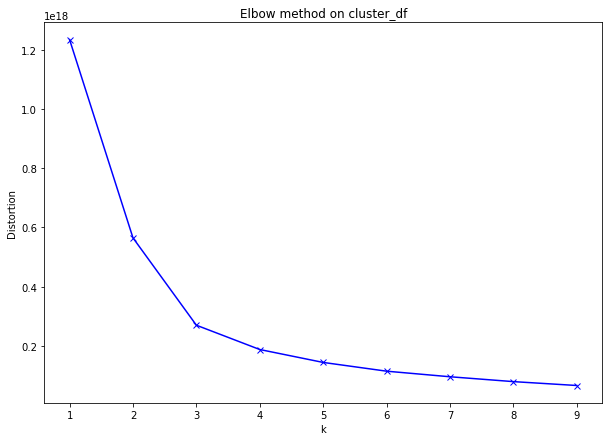

In [15]:
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(model_features)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method on cluster_df')

Given the dataset, the elbow method suggests 2-3 groups, but due to our models we want to use, we will select 2.

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(model_features)
model_features['successful_trend'] = kmeans.labels_

In [17]:
# Filter variables for our model
model_features = model_features[['views_per_date', 'categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled','time_to_trend', 'no_description', 'num_trending', 'successful_trend']]

In [18]:
model_features.head()

,views_per_date,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,time_to_trend,no_description,num_trending,successful_trend
0,9140911.000000000000,10.000000000000,9140911.000000000000,296541.000000000000,6180.000000000000,30059.000000000000,0,0,1.000000000000,0.000000000000,18.000000000000,0
1,2038853.000000000000,24.000000000000,2038853.000000000000,353797.000000000000,2628.000000000000,40222.000000000000,0,0,1.000000000000,0.000000000000,11.000000000000,0
2,2381688.000000000000,20.000000000000,2381688.000000000000,146740.000000000000,2794.000000000000,16549.000000000000,0,0,1.000000000000,0.000000000000,54.000000000000,0
3,1514614.000000000000,22.000000000000,1514614.000000000000,156914.000000000000,5857.000000000000,35331.000000000000,0,0,1.000000000000,0.000000000000,12.000000000000,0
4,1123889.000000000000,26.000000000000,1123889.000000000000,45803.000000000000,964.000000000000,2198.000000000000,0,0,1.000000000000,0.000000000000,11.000000000000,0


In [19]:
# Change type to int
model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']] = model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']] = model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']] = model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']].astype('int')
model_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21153 entries, 0 to 688852
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   views_per_date     21153 non-null  int64
 1   categoryId         21153 non-null  int64
 2   view_count         21153 non-null  int64
 3   likes              21153 non-null  int64
 4   dislikes           21153 non-null  int64
 5   comment_count      21153 non-null  int64
 6   comments_disabled  21153 non-null  int8 
 7   ratings_disabled   21153 non-null  int8 
 8   time_to_trend      21153 non-null  int64
 9   no_description     21153 non-null  int64
 10  num_trending       21153 non-null  int64
 11  successful_trend   21153 non-null  int32
dtypes: int32(1), int64(9), int8(2)
memory usage: 1.7 MB


### Baseline Model: Linear Regression w/o parameter tuning

#### Note

- Linear Regression is used for continuous dependant variables. In our situation, we are going to analyze trending vidoes by how many views they got per day. This gives us a better indicator of whather they were actually 'trending' and doesn't equate videos that were trending for one week vs. one day.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X = np.array(model_features.loc[:, model_features.columns != 'views_per_date'])
y = np.array(model_features.loc[:, model_features.columns == 'views_per_date']).reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [24]:
model_predict = lr_model.predict(X_test)

In [25]:
#Sample of our predictions
performance = pd.DataFrame({'Actual': y_test.flatten(), 'LinearRegression': list(model_predict.flatten())})
performance.head(10)

,Actual,LinearRegression
0,41748,-142144.138606210006
1,265913,504129.143953389430
2,886076,1005221.739827656187
3,830181,1011445.700921416865
4,123063,434916.112909295713
5,861932,773792.359637470450
6,752534,717670.415830651415
7,1288500,1281410.399712563492
8,330979,528374.261111112079
9,701698,704864.772564270301


#### Using RMSE & Normalised RMSE as our metric of error

In [26]:
rmse = sqrt(mean_squared_error(y_test, model_predict))
n_rmse = sqrt(mean_squared_error(y_test, model_predict)) / (y_test.max() - y_test.min())
print('The RMSE for this model is ', rmse)
print('The Normalised RMSE for this model is ', n_rmse)

The RMSE for this model is  1215803.7679173807
The Normalised RMSE for this model is  0.03659469144800184


In [27]:
lr_feature_importance = lr_model.coef_
lr_feature_importance

array([[-5.47643417e+03,  1.22542687e-01,  1.30859216e+00,
        -2.05698162e+00,  2.60752394e+00,  5.21358527e+05,
        -1.12049747e-09, -1.83525802e+05,  2.26276862e+05,
         6.67468160e+03,  4.30846815e+06]])

In [28]:
model_features.columns

Index(['views_per_date', 'categoryId', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'time_to_trend', 'no_description', 'num_trending', 'successful_trend'],
      dtype='object')

### Decision Trees w/o parameter tuning

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
X = np.array(model_features.loc[:, model_features.columns != 'views_per_date'])
y = np.array(model_features.loc[:, model_features.columns == 'views_per_date']).reshape(-1, 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
model_predict = dt_model.predict(X_test)

In [34]:
performance['DecisionTree'] = list(model_predict.flatten())
performance.head(10)

,Actual,LinearRegression,DecisionTree
0,41748,-142144.138606210006,41938.000000000000
1,265913,504129.143953389430,264609.000000000000
2,886076,1005221.739827656187,884932.000000000000
3,830181,1011445.700921416865,831029.000000000000
4,123063,434916.112909295713,122971.000000000000
5,861932,773792.359637470450,860254.000000000000
6,752534,717670.415830651415,749175.000000000000
7,1288500,1281410.399712563492,1287374.000000000000
8,330979,528374.261111112079,330668.000000000000
9,701698,704864.772564270301,702218.000000000000


In [35]:
dt_rmse = sqrt(mean_squared_error(y_test, model_predict))
dt_normalised_rmse = sqrt(mean_squared_error(y_test, model_predict)) / (y_test.max() - y_test.min())
print('The RMSE for this model is ', dt_rmse)
print('The Normalised RMSE for this model is ', dt_normalised_rmse)

The RMSE for this model is  412365.4014706995
The Normalised RMSE for this model is  0.012411858746334395


In [36]:
dt_feature_importance = dt_model.feature_importances_
dt_feature_importance

array([2.08775421e-06, 2.28852920e-01, 4.89161839e-01, 1.66430042e-03,
       2.54522549e-02, 1.38441001e-08, 0.00000000e+00, 2.48223713e-01,
       1.45658955e-10, 6.96451985e-04, 5.94641789e-03])

### Random Forest w/o parameter tuning

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [38]:
X = np.array(model_features.loc[:, model_features.columns != 'views_per_date'])
y = np.array(model_features.loc[:, model_features.columns == 'views_per_date']).reshape(-1, 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

<ipython-input-40-553550acb5eb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor()

In [41]:
model_predict = rf_model.predict(X_test)

In [42]:
performance['RandomForest'] = list(model_predict.flatten())
performance.head(10)

,Actual,LinearRegression,DecisionTree,RandomForest
0,41748,-142144.138606210006,41938.000000000000,41745.870000000003
1,265913,504129.143953389430,264609.000000000000,265560.739999999991
2,886076,1005221.739827656187,884932.000000000000,885407.219999999972
3,830181,1011445.700921416865,831029.000000000000,829036.569999999949
4,123063,434916.112909295713,122971.000000000000,123055.699999999997
5,861932,773792.359637470450,860254.000000000000,859130.760000000009
6,752534,717670.415830651415,749175.000000000000,751254.810000000056
7,1288500,1281410.399712563492,1287374.000000000000,1292261.209999999963
8,330979,528374.261111112079,330668.000000000000,330575.900000000023
9,701698,704864.772564270301,702218.000000000000,701725.939999999944


In [43]:
rmse = sqrt(mean_squared_error(y_test, model_predict))
n_rmse = sqrt(mean_squared_error(y_test, model_predict)) / (y_test.max() - y_test.min())
print('The RMSE for this model is ', rmse)
print('The Normalised RMSE for this model is ', n_rmse)

The RMSE for this model is  234653.49697782335
The Normalised RMSE for this model is  0.007062876876757309


In [44]:
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance

array([1.36643337e-04, 2.87843825e-01, 3.51396680e-01, 8.28211921e-03,
       9.91111127e-02, 4.92835911e-05, 0.00000000e+00, 2.35408386e-01,
       4.31838706e-05, 3.04387918e-03, 1.46848868e-02])

### XGBoost w/o parameter tuning

In [45]:
import xgboost as xgb

In [46]:
X = np.array(model_features.loc[:, model_features.columns != 'views_per_date'])
y = np.array(model_features.loc[:, model_features.columns == 'views_per_date']).reshape(-1, 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
model_predict = xgb_model.predict(X_test)

In [50]:
performance['XGBoost'] = list(model_predict.flatten())
performance.head(10)

,Actual,LinearRegression,DecisionTree,RandomForest,XGBoost
0,41748,-142144.138606210006,41938.000000000000,41745.870000000003,43215.257812500000
1,265913,504129.143953389430,264609.000000000000,265560.739999999991,262176.437500000000
2,886076,1005221.739827656187,884932.000000000000,885407.219999999972,880231.562500000000
3,830181,1011445.700921416865,831029.000000000000,829036.569999999949,802508.687500000000
4,123063,434916.112909295713,122971.000000000000,123055.699999999997,126216.539062500000
5,861932,773792.359637470450,860254.000000000000,859130.760000000009,865460.187500000000
6,752534,717670.415830651415,749175.000000000000,751254.810000000056,764103.000000000000
7,1288500,1281410.399712563492,1287374.000000000000,1292261.209999999963,1270559.500000000000
8,330979,528374.261111112079,330668.000000000000,330575.900000000023,343642.062500000000
9,701698,704864.772564270301,702218.000000000000,701725.939999999944,664484.500000000000


In [51]:
rmse = sqrt(mean_squared_error(y_test, model_predict))
n_rmse = sqrt(mean_squared_error(y_test, model_predict)) / (y_test.max() - y_test.min())
print('The RMSE for this model is ', rmse)
print('The Normalised RMSE for this model is ', n_rmse)

The RMSE for this model is  204800.83000107732
The Normalised RMSE for this model is  0.006164336202890758


### Understanding feature importance across all models

In [225]:
fi_table = pd.DataFrame()

In [226]:
fi_table['Feature'] = list(model_features.drop(['views_per_date'], axis=1).columns)

In [227]:
# Feature importance
fi_table['LinearRegression'] = [float(i)/sum(lr_feature_importance[0]) for i in lr_feature_importance[0]]
fi_table['DecisionTrees'] = dt_feature_importance
fi_table['RandomForest'] = rf_feature_importance

In [228]:
fi_table

,Feature,LinearRegression,DecisionTrees,RandomForest
0,categoryId,-0.001123652783,0.000010283799,0.000211198376
1,view_count,0.000000025143,0.234547616365,0.302757305534
2,likes,0.000000268496,0.483053971143,0.368199541959
3,dislikes,-0.000000422051,0.000561665754,0.011558094942
4,comment_count,0.000000535011,0.030681857121,0.085816872644
5,comments_disabled,0.106972153997,0.000000079813,0.000058151711
6,ratings_disabled,-0.000000000000,0.000000000000,0.000000000000
7,time_to_trend,-0.037655757653,0.250916501777,0.227800351627
8,no_description,0.046427404609,0.000000000726,0.000059523734
9,num_trending,0.001369508756,0.000228023502,0.002619202093
